In [ ]:
pip install seaborn

## Experiment 14
### Build an Artificial Neural Network using Backpropagation algorithm and test the same with appropriate dataset.

In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Wine dataset
wine = load_wine()

# Features (chemical properties of wines) and target (wine class)
X = wine.data
y = wine.target

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=1)

# Create an instance of MLPClassifier with specified parameters
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(100,), solver='lbfgs', batch_size=50)

# Fit the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute the confusion matrix to evaluate the predictions
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")  # Format accuracy to two decimal places

# Example test data for making a prediction
test = np.array([[14.37, 1.95, 2.5, 16.8, 113, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480]])

# Standardize the test data using the same scaler (important for consistency)
test_scaled = scaler.transform(test)

# Predict the class of the new sample
prediction = mlp.predict(test_scaled)

# Print the target names and the predicted class for the new sample
print(f"Wine types: {wine.target_names}")
print(f"Data prediction: {wine.target_names[prediction][0]}")


Confusion Matrix:
[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
Accuracy: 98.15%
Wine types: ['class_0' 'class_1' 'class_2']
Data prediction: class_0


# Following cells are not Required for the Experiment

## Confusion Matrix Visualization

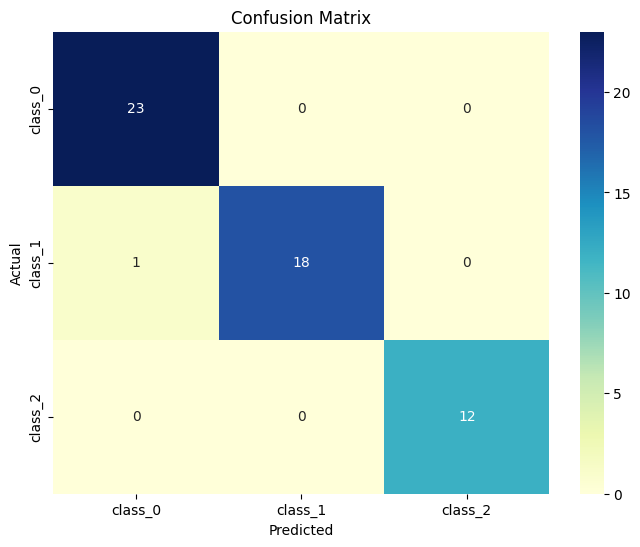

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ROC Curve

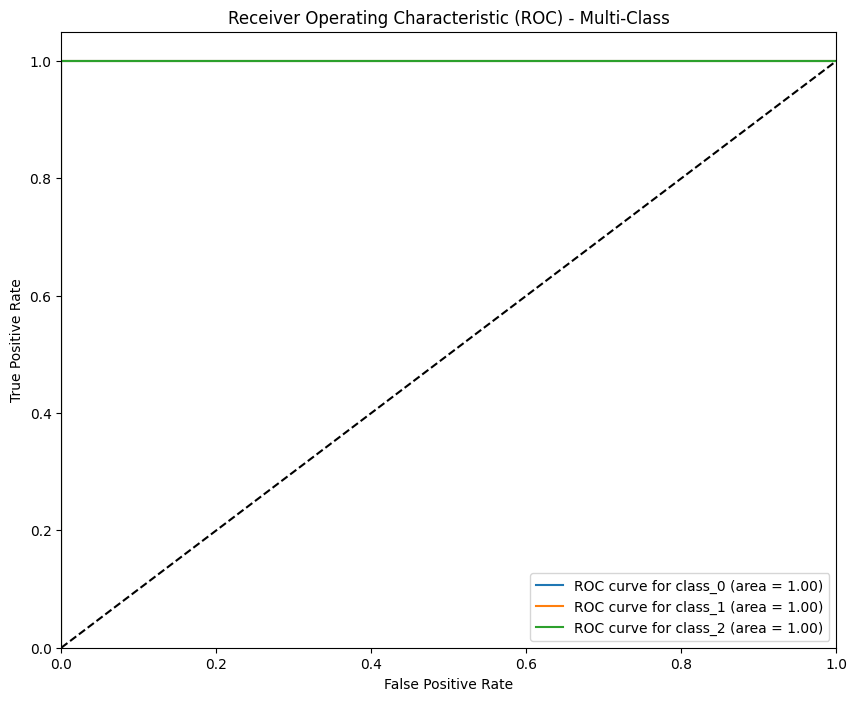

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = mlp.predict_proba(X_test)

plt.figure(figsize=(10, 8))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {wine.target_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [4]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=wine.target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        23
     class_1       1.00      0.95      0.97        19
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

